# House Price Prediction Using Machine Learning

Predicting the sale price of residential properties is a central challenge in real estate analytics. Accurate house price prediction can benefit home buyers, sellers, and real estate professionals by supporting better decision-making and resource allocation. With the increasing availability of structured housing datasets and advances in machine learning, it is now possible to model and forecast house prices with high reliability.

This project undertakes a comprehensive approach to **house price prediction** using a structured dataset containing diverse features such as **area, number of bedrooms and bathrooms, presence of amenities (e.g., air conditioning, hot water heating, basement), location advantages, and furnishing status**. The workflow encompasses essential steps of data analysis, including:

- **Exploratory Data Analysis (EDA):** Understanding dataset structure, distributions, and key relationships among features.
- **Data Preprocessing:** Cleaning and encoding categorical variables to make the data suitable for modeling.
- **Visualization:** Employing graphical tools to explore feature-target correlations and detect patterns.
- **Model Building:** Developing and evaluating multiple regression models—primarily Linear Regression and Random Forest Regressor—to identify the best-performing approach.
- **Prediction Interface:** Providing a user-friendly mechanism for predicting house prices on new data entries.

By integrating robust preprocessing techniques, systematic analysis, and interpretable models, this project demonstrates a practical blueprint for data-driven real estate valuation.


# Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Additional Libraries
import warnings 
warnings.filterwarnings("ignore")

sns.set()

# Loading the Dataset

In [2]:
df = pd.read_csv('Housing.csv')
print("Inital Dataset")
print("*"*145)
df.head(10)

Inital Dataset
*************************************************************************************************************************************************


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# Step 1: Exploratory Data Analysis (EDA)

The first step in the project is **Exploratory Data Analysis (EDA)**, which plays a crucial role in understanding the underlying structure and quality of the dataset. EDA involves systematically exploring the data to uncover patterns, identify anomalies, check assumptions, and test hypotheses—all of which inform subsequent modeling decisions.

Key actions in this step include:

- **Dataset Overview:** Use functions such as `df.info()` to inspect column data types, assess memory usage, and spot missing values or inconsistencies.  
- **Statistical Summary:** Apply `df.describe()` to obtain summary statistics for numerical features, helping to identify central tendencies, variability, and potential outliers.
- **Data Shape:** Retrieve the dataset’s dimensions using `df.shape` to understand the number of available records and features.
- **Handling Missing Values:** Detect and address missing data, employing functions like `df.isnull().sum()` for identification and `.fillna()` for imputation.

By methodically performing these analyses, EDA ensures the dataset is well understood and cleansed, establishing a solid foundation for effective preprocessing and modeling.


## 1.1 Dataset Overview

In [3]:
print("Dataset Information")
print("*"*20)
df.info()

Dataset Information
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## 1.2 Descriptive Statistics 

In [4]:
print("Dataset Descriptive Statistics")
print("*"*20)
df.describe(include='all')

Dataset Descriptive Statistics
********************


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


## 1.3 Shape of Dataset

In [5]:
print("Dataset Shape")
print("*"*20)
df.shape

Dataset Shape
********************


(545, 13)

## 1.4 Missing Value Analysis

In [6]:
print("Dataset Missing Value Analysis")
print("*"*20)
df.isnull().sum()

Dataset Missing Value Analysis
********************


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Step 2: Data Preprocessing

The second step, **Data Preprocessing**, transforms the raw dataset into a format suitable for machine learning models. This step is vital because machine learning algorithms require numerical inputs, consistent formats, and clean data to function effectively.

Key activities in this step include:

- **Encoding Categorical Variables:** Identify categorical columns and convert their values into numerical representations. For instance, binary categories like “Yes/No” are mapped to `1/0`, and multi-class features like “Furnishing Status” are encoded with distinct integers. This ensures that algorithms can interpret these variables appropriately.
- **Checking Unique Values:** Inspect the unique values within each categorical column to ensure there are no inconsistencies or unexpected entries, which might cause errors during encoding or modeling.
- **Data Sanity Checks:** After encoding, review the preprocessed dataset to confirm that all transformations have been applied correctly and that the data structure matches modeling requirements.

Effective preprocessing ensures that the subsequent modeling phase utilizes clean, consistent, and fully numerical data, thereby improving model reliability and performance.


## 2.1 Encoding Categorical Variables

### 2.1.1 Identification of Categorical Features

In [7]:
categorical_cols = df.select_dtypes(include='object').columns
print("Dataset Categorical COlumn names")
print("*"*20)
categorical_cols.to_list()

Dataset Categorical COlumn names
********************


['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

### 2.1.2 Unique Value Inspection

In [8]:
for i, col in enumerate(categorical_cols):
    print(f"{col} : {df[col].unique()}")
    print("*"*20)

mainroad : ['yes' 'no']
********************
guestroom : ['no' 'yes']
********************
basement : ['no' 'yes']
********************
hotwaterheating : ['no' 'yes']
********************
airconditioning : ['yes' 'no']
********************
prefarea : ['yes' 'no']
********************
furnishingstatus : ['furnished' 'semi-furnished' 'unfurnished']
********************


### 2.1.3 Encoding Categorical Variables

In [9]:
df['mainroad'] = df['mainroad'].map({'yes':1, 'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1, 'no':0})
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished':0, 'semi-furnished':1, 'furnished': 2})

## 2.2 Final Dataset Preparation

In [10]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,2
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0


# Step 3: Data Visualization

The third step, **Data Visualization**, leverages graphical techniques to explore and illustrate the relationships within the dataset. Visualization helps to intuitively understand data distributions, detect patterns, identify outliers, and interpret correlations among features and with the target variable (house price).

Key activities in this step include:

- **Target Variable Distribution Plots:** Plot the distribution of the house price and its relationship with key features using visualizations such as histograms, boxplots, or scatterplots. These plots reveal trends (e.g., how price varies with area or number of bedrooms) and help identify potential anomalies.
- **Subplot Comparisons:** Use subplot grids to compare how the target variable behaves against multiple features simultaneously, enhancing the ability to spot influential factors or feature interactions.
- **Correlation Heatmap:** Generate a heatmap of correlation coefficients using methods such as `seaborn.heatmap()`. This graphical summary highlights the strength of linear relationships between features and the target, guiding feature selection for modeling.

Through these visual analysis steps, insights are gained that inform model development, feature engineering, and validation strategies.


## 3.1 Target Variable Distribution Plots against features

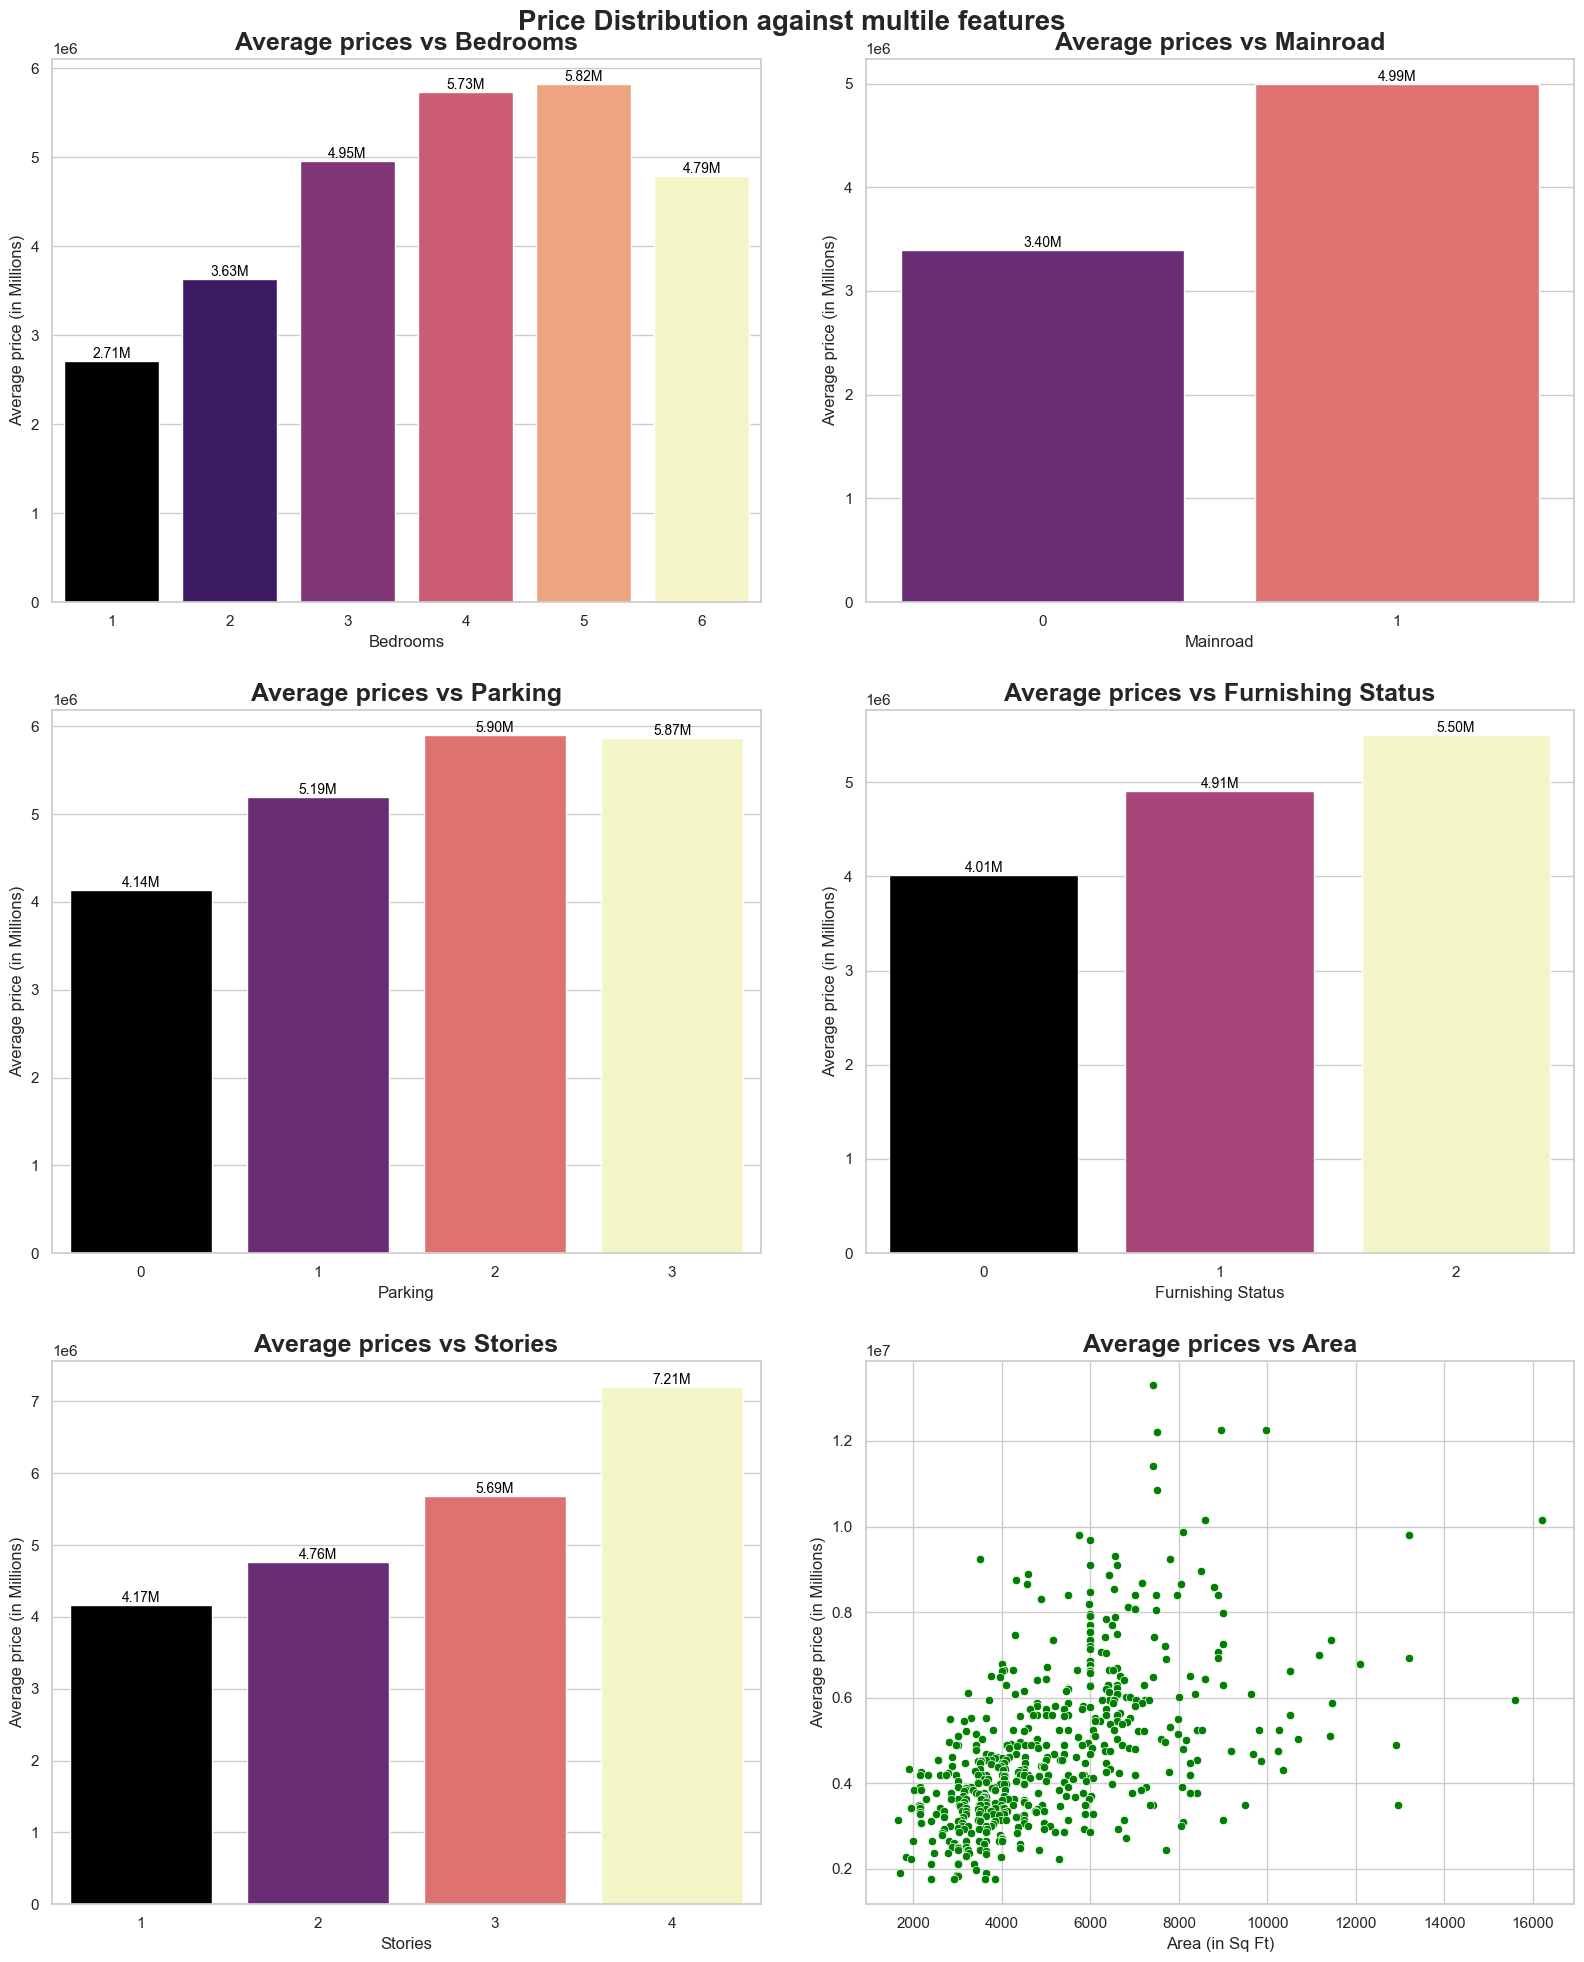

In [11]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,20))

plt.subplot(3,2, 1)
ax = sns.barplot(data=df, x='bedrooms', y='price', errorbar=None, hue='bedrooms', palette='magma')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height 1000000
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)/1e6:.2f}M',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
ax.legend_.remove()
plt.xlabel('Bedrooms')
plt.ylabel('Average price (in Millions)')
plt.title('Average prices vs Bedrooms', fontsize=18, fontweight='bold')

plt.subplot(3,2,2)
ax = sns.barplot(data=df, x='mainroad', y='price', errorbar=None, hue='mainroad', palette='magma')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height 1000000
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)/1e6:.2f}M',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
ax.legend_.remove()
plt.xlabel('Mainroad')
plt.ylabel('Average price (in Millions)')
plt.title('Average prices vs Mainroad', fontsize=18, fontweight='bold')

plt.subplot(3,2,3)
ax = sns.barplot(data=df, x='parking', y='price', errorbar=None, hue='parking', palette='magma')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height 1000000
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)/1e6:.2f}M',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
ax.legend_.remove()
plt.xlabel('Parking')
plt.ylabel('Average price (in Millions)')
plt.title('Average prices vs Parking', fontsize=18, fontweight='bold')

plt.subplot(3,2,4)
ax = sns.barplot(data=df, x='furnishingstatus', y='price', errorbar=None, hue='furnishingstatus', palette='magma')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height 1000000
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)/1e6:.2f}M',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
ax.legend_.remove()
plt.xlabel('Furnishing Status')
plt.ylabel('Average price (in Millions)')  
plt.title('Average prices vs Furnishing Status', fontsize=18, fontweight='bold')

plt.subplot(3,2,5)
ax = sns.barplot(data=df, x='stories', y='price', errorbar=None, hue='stories', palette='magma')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height 1000000
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)/1e6:.2f}M',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
ax.legend_.remove()
plt.xlabel('Stories')
plt.ylabel('Average price (in Millions)')  
plt.title('Average prices vs Stories', fontsize=18, fontweight='bold')

plt.subplot(3,2,6)
ax = sns.scatterplot(data=df, x='area', y='price', color='green')
plt.xlabel('Area (in Sq Ft)')
plt.ylabel('Average price (in Millions)')  
plt.title('Average prices vs Area', fontsize=18, fontweight='bold')

plt.suptitle('Price Distribution against multile features', fontsize=20, fontweight='bold')
plt.savefig('Price Distribution against multile features', bbox_inches='tight')
plt.tight_layout(w_pad=3, h_pad=2)
plt.show()

## 3.2 Correlation Heatmap

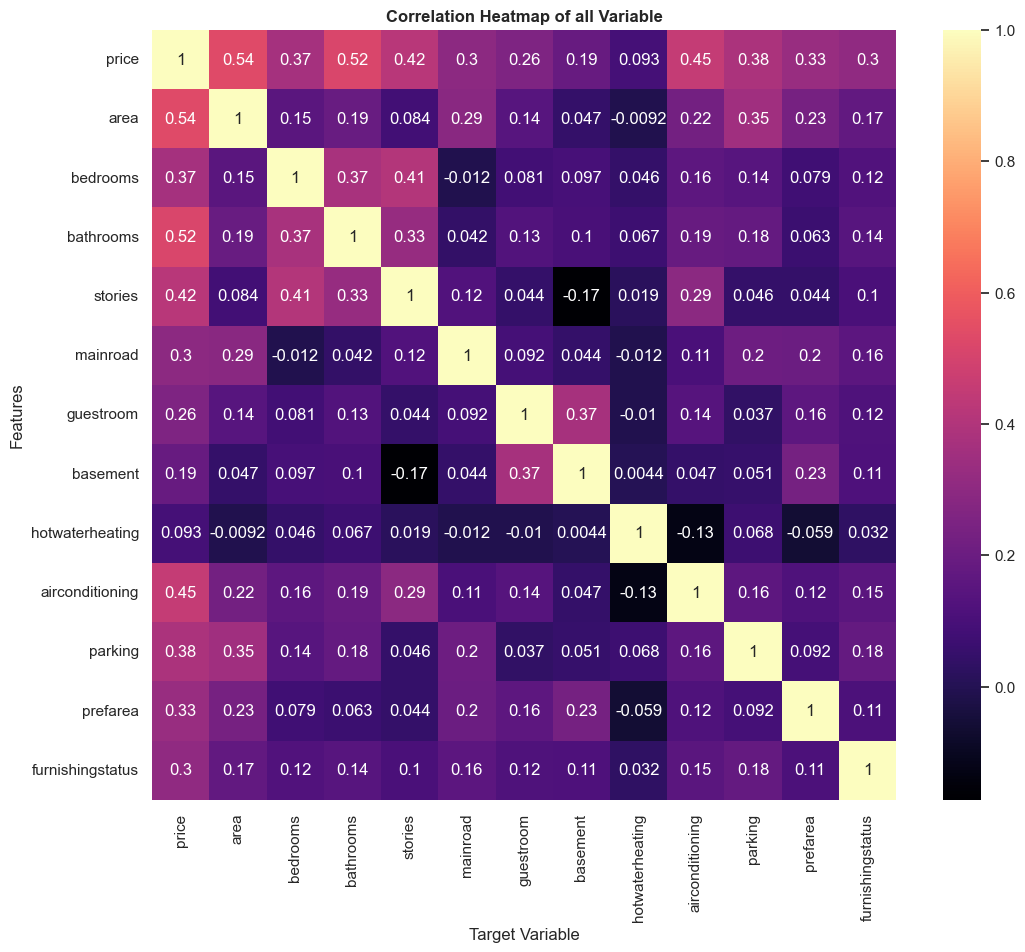

In [12]:
plt.figure(figsize = (12, 10))
sns.heatmap(pd.DataFrame(df.corr()), annot=True, cmap='magma')
plt.xlabel('Target Variable')
plt.ylabel('Features')
plt.title('Correlation Heatmap of all Variable', fontweight='bold')
plt.savefig('Correlation Heatmap', bbox_inches='tight')
plt.show()

# Step 4: Model Building

The fourth step, **Model Building**, focuses on developing predictive models to estimate house prices based on the processed features. This phase involves selecting relevant features, preparing the data for modeling, training different regression algorithms, and evaluating their performance to identify the best approach.

Key activities in this step include:

- **Feature Selection and Scaling:**  
  - Separate the dataset into input features (X) and target variable (y).  
  - Apply feature scaling techniques (such as StandardScaler or MinMaxScaler) to normalize numerical features, improving model convergence and performance.

- **Training and Testing Split:**  
  - Split the data into training and testing sets (e.g., 70-30 or 80-20) using `train_test_split()`. This ensures unbiased evaluation of the model on unseen data.

- **Model Creation:**  
  - Train regression models, primarily **Linear Regression**, and also **Random Forest Regression** as the final model for comparison.  
  - Fit these models on the training data to learn the relationship between features and house prices.

- **Model Evaluation:**  
  - Evaluate models using appropriate regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score, which quantify prediction accuracy.  
  - Visualize model performance via plots comparing actual versus predicted prices to assess fit quality.

- **Notes:**  
  - Since this is a regression problem, metrics like confusion matrix or classification report are not applicable and should be replaced by regression evaluation metrics.

Through this structured model development and evaluation process, the project identifies the most effective approach to accurately predict house prices.


## 4.1 Feature Selection and Scaling

### 4.1.1 Splitting data into features and target

In [13]:
X = df.drop(columns='price', axis=1)
y = df['price']

### 4.1.2 Feature Scaling

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4.2 Training and Testing Data Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=25)

## 4.3 Model Creation

In [16]:
linear_m = LinearRegression()
linear_m.fit(x_train, y_train)
pred_lr = linear_m.predict(x_test)

In [17]:
random_forest_m = RandomForestRegressor()
random_forest_m.fit(x_train, y_train)
pred_rf = random_forest_m.predict(x_test)

### 4.3.1 Model Evaluation

In [18]:
def evaluation_merices(y, y_pred):
    print(f"R2 Score: {r2_score(y, y_pred)*100:.2f}%")
    print("*"*20)
    print(f"MAE Score: {mean_absolute_error(y, y_pred)}")
    print("*"*20)
    print(f"MSE Score: {mean_squared_error(y, y_pred)}")
    print("*"*20)

In [19]:
print("Linear Regression Evaluation Metrices")
evaluation_merices(y_test, pred_lr)
print("+"*50)
print("Random Forest Evaluation Metrices")
evaluation_merices(y_test, pred_rf)

Linear Regression Evaluation Metrices
R2 Score: 66.45%
********************
MAE Score: 738578.6952250567
********************
MSE Score: 1031192811027.6768
********************
++++++++++++++++++++++++++++++++++++++++++++++++++
Random Forest Evaluation Metrices
R2 Score: 68.62%
********************
MAE Score: 724857.9070336393
********************
MSE Score: 964379596054.6501
********************


### 4.3.2 Graphical representation of how model fitted

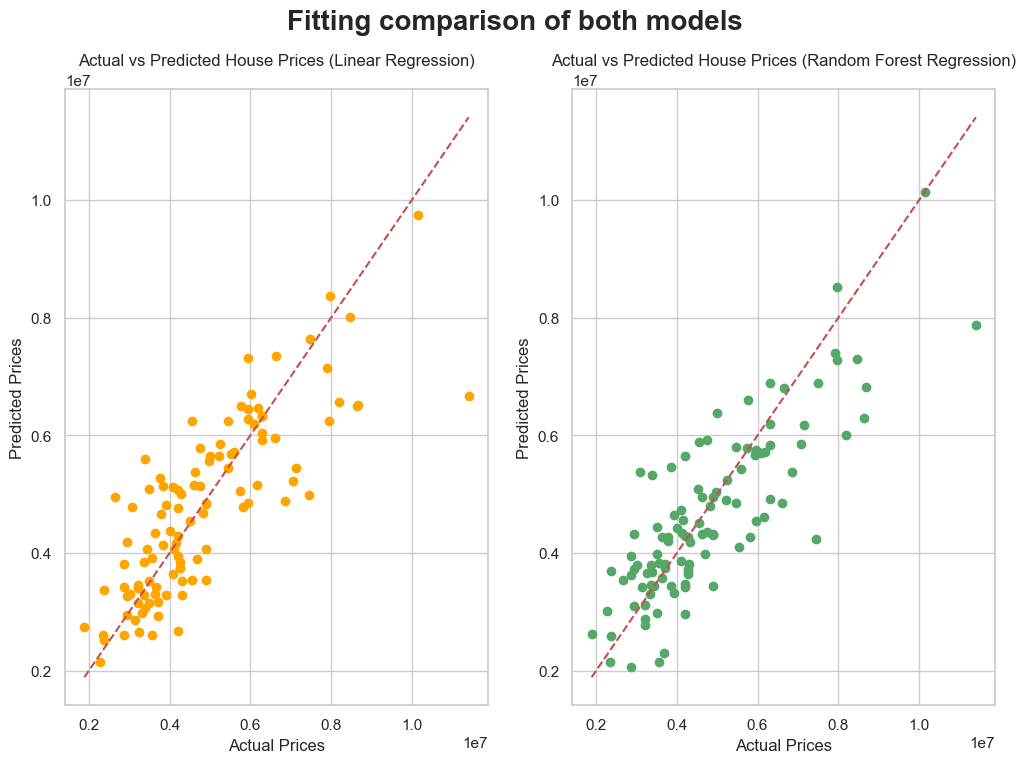

In [20]:
plt.figure(figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_lr, c='orange')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_rf, c='g')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Random Forest Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.suptitle('Fitting comparison of both models', fontsize=20, fontweight='bold')
plt.savefig('Fitting comparison of both models')
plt.show()

## Step 5: Prediction for New Data and Model Deployment

The final step in the project is to enable the **prediction of house prices for new inputs** and prepare the model for practical use. This involves converting user-provided data into the required numerical format, scaling it appropriately, and using the trained model to generate price estimates. Additionally, it lays the groundwork for deploying the model so it can be easily accessed for real-time predictions.

Key activities in this step include:

- **Encoding User Inputs:** Define functions to convert categorical user inputs into numerical values that the model understands. For example:
  - Binary conversions (`Yes`/`No` to `1`/`0`).
  - Multi-class encoding for furnishing status (e.g., Fully Furnished = 2, Semi Furnished = 1, Unfurnished = 0).

- **Feature Scaling:** Apply the same scaling transformation (e.g., StandardScaler) used during training to the new input data, ensuring consistency and model reliability.

- **Prediction Function:** Create a function that takes the preprocessed and scaled input data, feeds it into the trained model (Random Forest Regression in this case), and returns the predicted house price.

- **Model Serialization and Deployment (Optional):**  
  - Save the trained model and scaler using serialization libraries such as `joblib` or `pickle`.  
  - This prepares the model for deployment in a production environment, where it can serve predictions via APIs or web interfaces.  
  - Consider developing a simple user interface or API (using frameworks like Flask, FastAPI, or Streamlit) to facilitate real-time prediction requests.

This step bridges the gap between model development and practical application, enabling end-users to obtain house price predictions based on their custom inputs efficiently and accurately.


In [21]:
def predict_price(new_data):
    new_data_scaled = scaler.transform(new_data)
    price = random_forest_m.predict(new_data_scaled)
    return price

def encode_yes_no(string):
    return 0 if string == 'no' else 1

def encode_furniture_status(string):
    if string == 'fully furnished':
        return 2
    elif string == 'semi furnished':
        return 1
    else:
        return 0

def user_input():
    area = int(input("The total area of the house in square feet: "))
    bedrooms = int(input("The number of bedrooms in the house: "))
    bathrooms = int(input("The number of bathrooms in the house: "))
    stories = int(input("The number of stories in the house: "))
    mainroad = encode_yes_no(input("Whether the house is connected to the main road (Yes/No): ").lower())
    guestroom = encode_yes_no(input("Whether the house has a guest room (Yes/No): ").lower())
    basement = encode_yes_no(input("Whether the house has a basement (Yes/No): ").lower())
    hotWaterHeating = encode_yes_no(input("Whether the house has a hot water heating system (Yes/No): ").lower())
    airconditioning = encode_yes_no(input("Whether the house has an air conditioning system (Yes/No): ").lower())
    parking = int(input("The number of parking spaces available within the house: "))
    prefarea = encode_yes_no(input("Whether the house is located in a preferred area (Yes/No): ").lower())
    furnishingstatus = encode_furniture_status(input("The furnishing status of the house (Fully Furnished, Semi Furnished, Unfurnished): ").lower())

    user_input_value = np.array([[area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotWaterHeating, airconditioning, parking, prefarea, furnishingstatus]])

    print("*"*30)
    print(f"Your House Price: {predict_price(user_input_value)[0]/1e6:.2f} Million")

user_input()

The total area of the house in square feet:  350
The number of bedrooms in the house:  2
The number of bathrooms in the house:  1
The number of stories in the house:  4
Whether the house is connected to the main road (Yes/No):  yes
Whether the house has a guest room (Yes/No):  no
Whether the house has a basement (Yes/No):  no
Whether the house has a hot water heating system (Yes/No):  no
Whether the house has an air conditioning system (Yes/No):  no
The number of parking spaces available within the house:  1
Whether the house is located in a preferred area (Yes/No):  yes
The furnishing status of the house (Fully Furnished, Semi Furnished, Unfurnished):  unfurnished


******************************
Your House Price: 4.10 Million


## 5.1 Saving the model and the standardizer

In [22]:
import joblib
joblib.dump(random_forest_m, 'house_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Conclusion

This project demonstrates a comprehensive approach to **house price prediction** using machine learning techniques. Starting from thorough exploratory data analysis and careful data preprocessing, the project ensures that the dataset is clean, well-understood, and appropriately formatted for modeling. Through effective visualization, key relationships and influential features were identified, guiding informed model selection.

By training and evaluating regression models such as Linear Regression and Random Forest, the project highlights the effectiveness and interpretability of different algorithms for predicting house prices. The final model, backed by rigorous evaluation metrics, provides reliable price estimates based on input features.

Moreover, the implementation of encoding functions and a prediction interface enables practical use of the model for real-time house price prediction on new data. This end-to-end pipeline not only illustrates the power of data-driven real estate valuation but also establishes a foundation for further enhancements, such as deploying the model in an interactive application or experimenting with advanced algorithms.

Overall, this project equips users with insights and tools to better understand housing market dynamics and make more informed decisions based on predictive analytics.
